<a href="https://colab.research.google.com/github/axrd/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/DS_Unit_2_Sprint_2_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [0]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
# Dropping "date" to simplify things.
# It's a string cast as an object, which messes up sklearn train/test/split
# Doubt it has predictive power, and I'm not sure how I'd test it anyway. 
df.drop('date', axis = 1, inplace=True)

In [0]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
##### Your Code Here #####

# Tools:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Calculate the correlation of each feature to the target "Price":

df[df.columns[1:]].corr()['price'][:].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

In [0]:
### Scikit-Learn Bivariate regression: 'sqft_living' vs 'price' ###

# Setting up 1-feat X and y (with random state for reproducibility):
y = df.price.values
X_1 = df.sqft_living.values[:, np.newaxis]

X_train, X_test, Y_train, Y_test = train_test_split(X_1, y, test_size=0.5, random_state=42)

# Creating Lin Regression:
model = LinearRegression()
model.fit(X_train,Y_train)

print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

Coefficient: 
 [268.42931803]

 Intercept:  -20631.156554487883


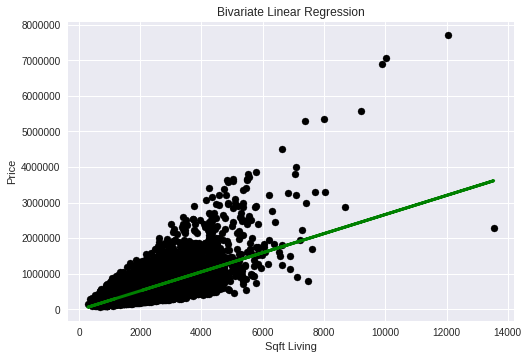

MSE is 75628624138.70985
RMSE is 275006.58926416625
R^2 is 0.49226256935760826


In [0]:
# Making predictions using the testing set of the data. 
y_test_predict = model.predict(X_test)

# Plotting points:
plt.scatter(X_test, Y_test, color='black')

# Plotting line:
plt.plot(X_test, y_test_predict, color = "green", linewidth=3)

# Graph details:
plt.ylabel("Price")
plt.xlabel("Sqft Living")
plt.title("Bivariate Linear Regression")
plt.show()

# Printing Mean Squared Error, Root Mean Squared Error, & R2:
MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

R2 = r2_score(Y_test, y_test_predict)

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))



# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [0]:
##### Your Code Here #####

### 2 Variable Multiple Regression: 'sqft_living' & 'grade' vs 'price' ###

# Setting up 2-feat X and y (with random state for reproducibility):
y = df.price.values
X_2 = df[['sqft_living', 'grade']].values

X_train, X_test, Y_train, Y_test = train_test_split(X_2, y, test_size=0.5, random_state=42)

# Creating Lin Regression:
model2 = LinearRegression()
model2.fit(X_train,Y_train)

print("Coefficient: \n", model2.coef_)
print("\n Intercept: ", model2.intercept_)

Coefficient: 
 [   167.10832275 103065.16259903]

 Intercept:  -599835.6618581187


ValueError: ignored

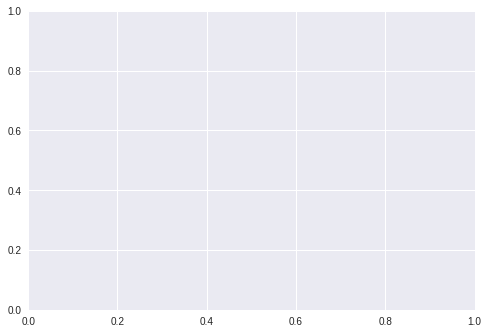

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


# Making predictions using the testing set of the data. 
y2_test_predict = model2.predict(X_test)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(X_test, Y_test, df['y'],c='black')

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz,alpha=0.5)
plt.title("Regression Plane")

plt.show()



# Plotting points:
plt.scatter(X_test, Y_test, color='black')

# Plotting lines:
plt.plot(X_test, y2_test_predict, color = "green", linewidth=3)

# Graph details:
plt.ylabel("Price")
plt.xlabel("Sqft Living & Grade")
plt.title("2 Variable Multiple Linear Regression")
plt.show()

# Printing Mean Squared Error, Root Mean Squared Error, & R2:
MSE = mean_squared_error(Y_test, y2_test_predict)
RMSE = (np.sqrt(mean_squared_error(Y_test, y2_test_predict)))

R2 = r2_score(Y_test, y2_test_predict)

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
##### Your Code Here #####


# Setting up X and y using all available X variables (with random state for reproducibility):
y = df.price
X_all = df.drop('price', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X_all, y, test_size=0.5, random_state=42)

# Creating Lin Regression:
model_all = LinearRegression()
model_all.fit(X_train,Y_train)

print("Coefficient: \n", model_all.coef_)
print("\n Intercept: ", model_all.intercept_)

Coefficient: 
 [-2.00506453e-06 -3.41181059e+04  3.97473262e+04  9.89756793e+01
  9.32592572e-02  1.00895137e+04  5.72441870e+05  5.38583443e+04
  2.45630510e+04  9.96587887e+04  5.99886239e+01  3.89870555e+01
 -2.48106275e+03  2.10197652e+01 -5.41292831e+02  5.90386757e+05
 -1.82472792e+05  2.65417221e+01 -3.89604248e-01]

 Intercept:  6923623.552565315


In [0]:
# Making predictions using the testing set of the data. 
y_all_test_predict = model_all.predict(X_test)


# Printing Mean Squared Error, Root Mean Squared Error, & R2:
MSE = mean_squared_error(Y_test, y_all_test_predict)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_all_test_predict)))

R2 = r2_score(Y_test, y_all_test_predict)

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))


MSE is 46543830648.17032
RMSE is 215740.19247272937
R^2 is 0.6875251235271282


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
